## Take-Home Assignment#3 (Due: 10/23)
Data Science Bootcamp_gl2996

### Setup / Data Load

In [1]:
# 0) Setup & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Try online URL; if it fails, fall back to a local file with the same dataset
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
try:
    df = pd.read_csv(url)
except Exception as e:
    print("Failed to load from URL. Falling back to local file:", e)
    df = pd.read_csv('Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv')

# Parse timestamps and build basic datetime features
df['dt'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
df = df.dropna(subset=['dt']).copy()

df['year'] = df['dt'].dt.year
df['hour'] = df['dt'].dt.hour
df['dow']  = df['dt'].dt.dayofweek  # Monday=0, Sunday=6
dow_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['dow_name'] = df['dow'].map(dow_map)

# Ensure numeric types for analysis
for col in ['Pedestrians', 'Towards Manhattan', 'Towards Brooklyn', 'temperature', 'precipitation']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Quick sanity check
print("Columns:", df.columns.tolist())
print("Data range:", df['dt'].min(), "→", df['dt'].max())
print("Shape:", df.shape)


/var/folders/0p/1npg8mjd01g51gkcp94gtms80000gn/T/ipykernel_9322/3880028089.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dt'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


Columns: ['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan', 'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation', 'lat', 'long', 'events', 'Location1', 'dt', 'year', 'hour', 'dow', 'dow_name']
Data range: 2017-10-01 00:00:00 → 2019-12-31 23:00:00
Shape: (16057, 17)


### Problem 1 (Pandas/Matplotlib): Filter Weekdays & Plot Pedestrian Counts by Day-of-Week
**Task:** Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.


,weekday,avg_pedestrians_per_hour
0,Mon,642.983941
1,Tue,599.210911
2,Wed,574.956140
3,Thu,601.263158
4,Fri,696.521053


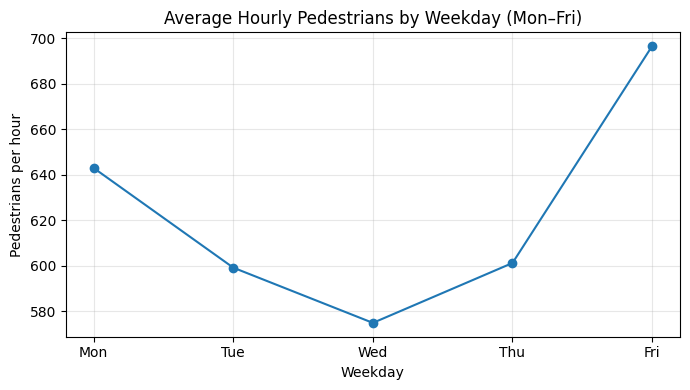

In [2]:
# 1) Filter to weekdays (Mon–Fri) and plot average hourly pedestrian counts by weekday

# Keep only Monday (0) through Friday (4)
weekdays = df[df['dow'].between(0, 4)].copy()

# Compute average pedestrians per hour for each weekday index
weekday_profile = (
    weekdays.groupby('dow', as_index=False)['Pedestrians']
    .mean()
    .sort_values('dow')
)
weekday_profile['dow_name'] = weekday_profile['dow'].map(dow_map)

# Display a tidy table for quick inspection
display(
    weekday_profile[['dow_name', 'Pedestrians']]
    .rename(columns={'dow_name':'weekday', 'Pedestrians':'avg_pedestrians_per_hour'})
)

# Line plot of average hourly pedestrians by weekday (Mon–Fri)
plt.figure(figsize=(7, 4))
plt.plot(weekday_profile['dow_name'], weekday_profile['Pedestrians'], marker='o')
plt.title('Average Hourly Pedestrians by Weekday (Mon–Fri)')
plt.xlabel('Weekday')
plt.ylabel('Pedestrians per hour')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Problem 2 (Pandas/Matplotlib/Stats): 2019 Brooklyn Bridge — Weather Impact & Correlation Analysis
**Task:** Subset the data to the year 2019, summarize pedestrian counts by `weather_summary` (and sort), and compute a correlation matrix to assess relationships among pedestrian counts and weather variables.


,weather_summary,avg_peds,median_peds,hours,avg_temp,avg_rain
4,partly-cloudy-day,1574.093627,1632.0,1773,66.173717,0.000176
0,clear-day,1382.183298,1380.0,1413,55.523708,0.000062
9,wind,679.000000,403.0,4,51.000000,0.000575
2,cloudy,543.225041,122.0,1813,52.075014,0.001302
6,rain,229.822076,52.0,607,53.911038,0.056557
8,snow,222.631579,29.5,38,31.763158,0.024713
3,fog,212.409091,80.0,22,45.454545,0.005032
7,sleet,178.250000,155.5,8,34.000000,0.028237
5,partly-cloudy-night,52.765922,10.0,1209,55.425145,0.000251
1,clear-night,33.233871,4.0,1860,47.605376,0.000010


,weather_summary,avg_peds,median_peds,hours,avg_temp,avg_rain
0,clear-day,1382.183298,1380.0,1413,55.523708,0.000062
1,clear-night,33.233871,4.0,1860,47.605376,0.000010
2,cloudy,543.225041,122.0,1813,52.075014,0.001302
3,fog,212.409091,80.0,22,45.454545,0.005032
4,partly-cloudy-day,1574.093627,1632.0,1773,66.173717,0.000176
5,partly-cloudy-night,52.765922,10.0,1209,55.425145,0.000251
6,rain,229.822076,52.0,607,53.911038,0.056557
7,sleet,178.250000,155.5,8,34.000000,0.028237
8,snow,222.631579,29.5,38,31.763158,0.024713
9,wind,679.000000,403.0,4,51.000000,0.000575



[2019 Correlation Matrix] (Pearson)


,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation
Pedestrians,1.000,0.989,0.991,0.359,-0.105
Towards Manhattan,0.989,1.000,0.961,0.356,-0.105
Towards Brooklyn,0.991,0.961,1.000,0.354,-0.104
temperature,0.359,0.356,0.354,1.000,0.002
precipitation,-0.105,-0.105,-0.104,0.002,1.000


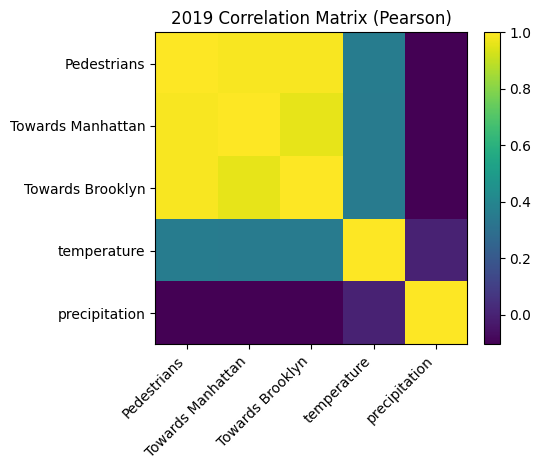

In [3]:
# 2) Focus on 2019 and analyze how weather relates to pedestrian counts

# Keep only 2019 rows (location is Brooklyn Bridge in this dataset)
df_2019 = df[df['year'] == 2019].copy()

# Aggregate by weather_summary: average & median pedestrians, count of hours, and average weather stats
weather_agg = (
    df_2019.groupby('weather_summary', dropna=True, as_index=False)
    .agg(
        avg_peds=('Pedestrians', 'mean'),
        median_peds=('Pedestrians', 'median'),
        hours=('Pedestrians', 'size'),
        avg_temp=('temperature', 'mean'),
        avg_rain=('precipitation', 'mean')
    )
)

# (A) Sorted by average pedestrians (useful to see which weather yields more activity)
display(weather_agg.sort_values('avg_peds', ascending=False))

# (B) Also provide alphabetic sort by weather_summary (if you specifically want "sorted by weather summary")
display(weather_agg.sort_values('weather_summary', ascending=True))

# Correlation matrix among continuous variables
# Note: weather_summary is categorical; correlations here reflect temp/precip and direction splits vs pedestrians.
num_cols = [c for c in ['Pedestrians','Towards Manhattan','Towards Brooklyn','temperature','precipitation']
            if c in df_2019.columns]
corr_2019 = df_2019[num_cols].corr(method='pearson').round(3)

print("\n[2019 Correlation Matrix] (Pearson)")
display(corr_2019)

# Simple heatmap (matplotlib only)
plt.figure(figsize=(5.8, 4.8))
im = plt.imshow(corr_2019.values, interpolation='nearest')
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
plt.yticks(range(len(num_cols)), num_cols)
plt.title('2019 Correlation Matrix (Pearson)')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


### Problem 3 (Pandas): Time-of-Day Bucketing & Intra-Day Activity Patterns
**Task:** Implement a function that maps hour to {Morning, Afternoon, Evening, Night}, create a `time_of_day` column, and analyze pedestrian activity by these time-of-day categories.


,time_of_day,avg_pedestrians_per_hour
3,Night,13.001993
2,Morning,614.543099
0,Afternoon,1694.841305
1,Evening,426.206776


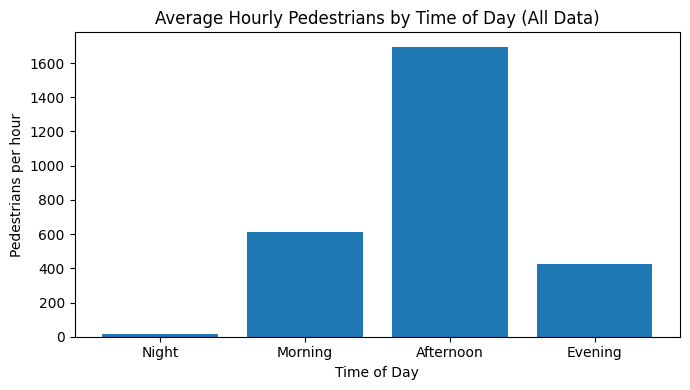

,time_of_day,avg_pedestrians_per_hour
3,Night,4.240102
2,Morning,604.210089
0,Afternoon,1546.106641
1,Evening,318.928480


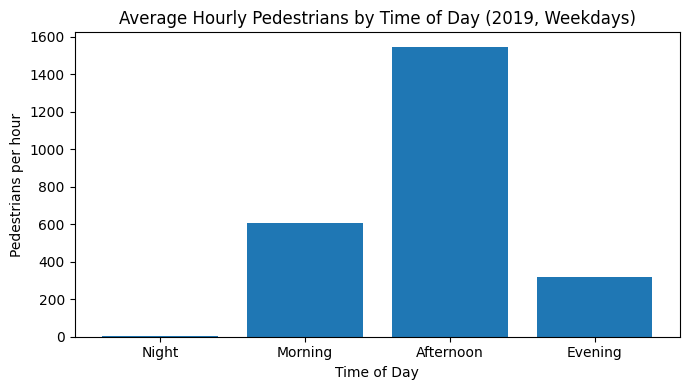

In [4]:
# 3) Implement a custom function to categorize time of day and analyze patterns

def categorize_time_of_day(h: int) -> str:
    """Map an hour (0–23) to one of four buckets: Night, Morning, Afternoon, Evening."""
    if 0 <= h <= 5:
        return 'Night'
    elif 6 <= h <= 11:
        return 'Morning'
    elif 12 <= h <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

# Create new column with time-of-day categories
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

# Compute average pedestrians per hour for each time-of-day bucket (all data)
tod_order = ['Night', 'Morning', 'Afternoon', 'Evening']
tod_profile = (
    df.groupby('time_of_day', as_index=False)['Pedestrians']
    .mean()
)
# Enforce a readable order
tod_profile['order'] = tod_profile['time_of_day'].map({k:i for i,k in enumerate(tod_order)})
tod_profile = tod_profile.sort_values('order').drop(columns='order')

# Display and plot (all data)
display(tod_profile.rename(columns={'Pedestrians':'avg_pedestrians_per_hour'}))

plt.figure(figsize=(7, 4))
plt.bar(tod_profile['time_of_day'], tod_profile['Pedestrians'])
plt.title('Average Hourly Pedestrians by Time of Day (All Data)')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrians per hour')
plt.tight_layout()
plt.show()

# Optional: restrict to 2019 weekdays to see a cleaner commuter pattern
tod_2019_weekdays = (
    df[(df['year']==2019) & (df['dow'].between(0,4))]
    .groupby('time_of_day', as_index=False)['Pedestrians']
    .mean()
)
tod_2019_weekdays['order'] = tod_2019_weekdays['time_of_day'].map({k:i for i,k in enumerate(tod_order)})
tod_2019_weekdays = tod_2019_weekdays.sort_values('order').drop(columns='order')

display(tod_2019_weekdays.rename(columns={'Pedestrians':'avg_pedestrians_per_hour'}))

plt.figure(figsize=(7, 4))
plt.bar(tod_2019_weekdays['time_of_day'], tod_2019_weekdays['Pedestrians'])
plt.title('Average Hourly Pedestrians by Time of Day (2019, Weekdays)')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrians per hour')
plt.tight_layout()
plt.show()
